# Neural Networks image recognition - MultiLayer Perceptron
Use both MLNN for the following problem.

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.

# `np.random.normal`

## Parameters

### loc

Mean (“centre”) of the distribution.

### scale

Standard deviation (spread or “width”) of the distribution. Must be non-negative.

### size

Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars. Otherwise, np.broadcast(loc, scale).size samples are drawn.

# Neural Networks - Image Recognition 

In [26]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from keras import backend

In [7]:
import matplotlib.pyplot as  plt
%matplotlib inline

In [13]:
import numpy as np
import pandas as pd

In [104]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

0
4
1
9
2
1
3
1
4


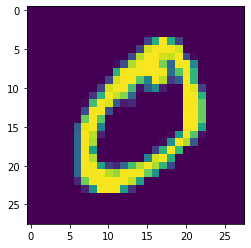

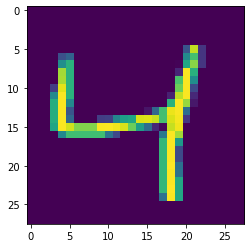

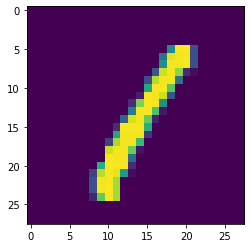

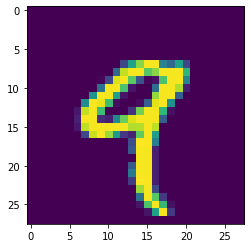

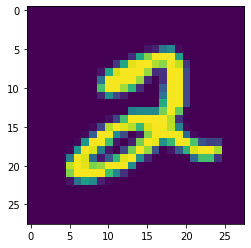

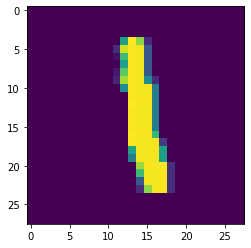

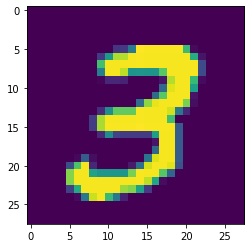

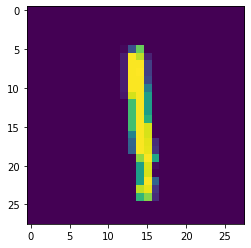

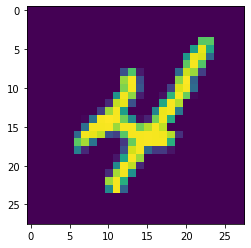

<Figure size 432x288 with 0 Axes>

In [58]:
for i in range(1, 10):
    plt.imshow(x_train[i]) #show the image in the x_train dataset
    plt.figure(i + 1)
    print(y_train[i]) #print the y_train output

Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **

In [59]:
x_noise = x_train + np.random.normal(scale = 100, size = x_train.shape) # change scale to 100 to add noise and pixelate images

0
4
1
9
2
1
3
1
4


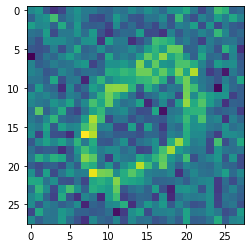

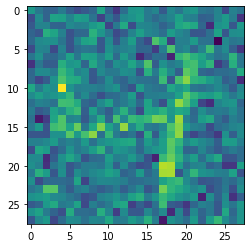

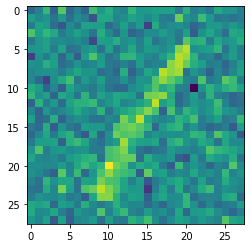

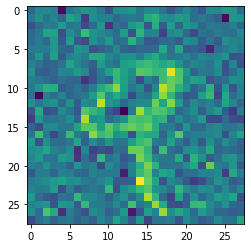

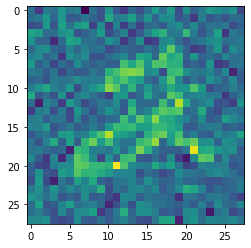

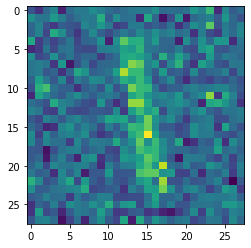

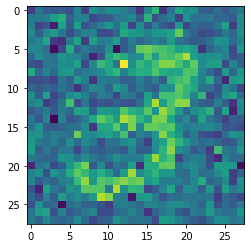

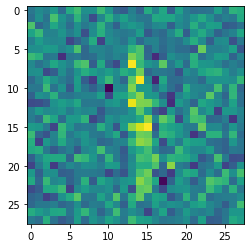

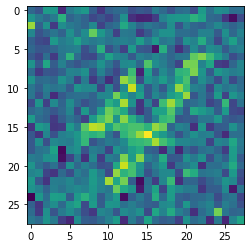

<Figure size 432x288 with 0 Axes>

In [60]:
for i in range(1, 10):
    plt.imshow(x_noise[i]) #show the image in the x_train dataset w/ added noise
    plt.figure(i + 1)
    print(y_train[i]) #print the y_train output

Compare the `accuracy` of train and val after N epochs for MLNN with and without noise.

In [105]:
x_noise2 = x_train + np.random.normal(scale = 50, size = x_train.shape)

In [106]:
# Images with noise
print("Image 1:", x_noise2[0, :10])
print("Image 2:", x_noise2[1, :10])
print("Image 3:", x_noise2[2, :10])
print("Image 4:", x_noise2[3, :10])
print("Image 5:", x_noise2[4, :10])

Image 1: [[ 4.49352511e+01  3.87230059e+01 -4.46361430e+01 -1.68469725e+01
   9.85222783e+01 -8.64277333e+00 -4.46782946e+01 -4.75080108e+01
   8.68141073e+01 -7.05784899e+01  4.87753976e+01  1.11686308e+02
  -2.18499550e+01 -8.10802711e+01  1.19685316e+01  1.02494384e+02
  -1.14811778e+01  4.96623008e+01  3.53500641e+01  1.64821002e+00
   5.84128537e+01 -7.33304387e+01  4.72045442e+01 -5.20803179e+01
   1.55079301e+01  6.34797971e+01  1.89430323e+01 -3.24821555e+01]
 [-2.54170588e+01 -4.73322467e+01 -1.90884582e+00 -1.94778085e+01
   2.98326689e+01  5.24928688e+00 -4.45370871e+01  1.47543014e+01
   3.06498262e+01  7.57169968e+01 -2.31284967e+01  2.22293359e+01
   5.14412708e+01  6.55005380e+01 -4.16643494e+01  1.49716521e+00
   8.26071985e+01 -3.46673025e+01 -4.57619251e+01 -1.62809220e+01
  -4.38326115e+01  5.79405039e+01 -5.40293293e+01  1.74103507e+01
   2.70923034e+01  3.99324200e+01  5.69499035e+00 -4.18511520e+01]
 [-2.14316016e+01 -1.37503837e+01  5.56268490e+01  4.49576021e+01

In [107]:
# Images without noise
print("Image 1:", x_train[0, :5])
print("Image 2:",x_train[1, :5])
print("Image 3:", x_train[2, :5])
print("Image 4:", x_train[3, :5])
print("Image 5:", x_train[5, :5])

Image 1: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Image 2: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]]
Image 3: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [65]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [66]:
# no noise refitting

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [67]:
# accuracy without noise is 98.2%

batch_size = 128
num_classes = 10
epochs = 20

# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.summary()

model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(),
              metrics = ['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 512)               401920    
                                                                 
 dropout_16 (Dropout)        (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 512)               262656    
                                                                 
 dropout_17 (Dropout)        (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [============================

Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.

In [76]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [77]:
# reshape the data

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [78]:
scales = [0.1, 0.5, 1.0, 2.0, 4.0]
train_accuracy = []
test_accuracy = []

batch_size = 128
num_classes = 10
epochs = 20

# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

for scale in scales:
    x_tr_noise = x_train + np.random.normal(scale = scale, size = x_train.shape)
    x_tst_noise = x_test + np.random.normal(scale = scale, size = x_test.shape)

    model = Sequential()
    model.add(Dense(512, activation = 'relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation = 'softmax'))

    model.summary()

    model.compile(loss = 'categorical_crossentropy',
                  optimizer = RMSprop(),
                  metrics = ['accuracy'])

    history = model.fit(x_tr_noise, y_train,
                        batch_size = batch_size,
                        epochs = epochs,
                        verbose = 1,
                        validation_data = (x_tst_noise, y_test))
    score = model.evaluate(x_tst_noise, y_test, verbose = 0)
    
    train_accuracy.append(history.history['accuracy'][-1])
    test_accuracy.append(score[1])

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 512)               401920    
                                                                 
 dropout_26 (Dropout)        (None, 512)               0         
                                                                 
 dense_40 (Dense)            (None, 512)               262656    
                                                                 
 dropout_27 (Dropout)        (None, 512)               0         
                                                                 
 dense_41 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [===========================

                                                                 
 dropout_30 (Dropout)        (None, 512)               0         
                                                                 
 dense_46 (Dense)            (None, 512)               262656    
                                                                 
 dropout_31 (Dropout)        (None, 512)               0         
                                                                 
 dense_47 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 6s 12ms/step - loss: 1.0884 - accuracy: 0.6320 - val_loss: 0.7912 - val_accuracy: 0.7344
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 0.6695 - accuracy: 0.7753 - val_loss: 0.7337 - val

 dropout_35 (Dropout)        (None, 512)               0         
                                                                 
 dense_53 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 7s 14ms/step - loss: 2.4191 - accuracy: 0.1554 - val_loss: 2.1683 - val_accuracy: 0.2097
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 2.0892 - accuracy: 0.2510 - val_loss: 2.1381 - val_accuracy: 0.2284
Epoch 3/20
469/469 [==============================] - 5s 12ms/step - loss: 1.9530 - accuracy: 0.3049 - val_loss: 2.1460 - val_accuracy: 0.2320
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 1.8323 - accuracy: 0.3523 - val_loss: 2.1811 - val_accuracy: 0.2214
Epoch 5/20
469/469 [======

In [83]:
print("The training accuracy results are:" ,train_accuracy)
print("The testing accuracy results are:", test_accuracy)

The training accuracy results are: [0.9980999827384949, 0.994533360004425, 0.9777666926383972, 0.8930833339691162, 0.6640999913215637]
The testing accuracy results are: [0.9760000109672546, 0.9215999841690063, 0.7613000273704529, 0.4068000018596649, 0.1890999972820282]


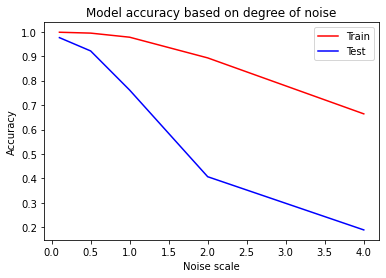

In [87]:
# Model accuracy decreases and noise increases. This is expected.

plt.figure()
plt.plot(scales, train_accuracy, label = 'Train', c = "red")
plt.plot(scales, test_accuracy, label = 'Test', c = "blue")
plt.xlabel('Noise scale')
plt.ylabel('Accuracy')
plt.title('Model accuracy based on degree of noise')
plt.legend()
plt.show()